In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
adventure_works_df = pd.ExcelFile('D:\\daneshkar\\HW-L03-02-statistics\\Adventure Works 2020.xlsx')

In [4]:
customers_df = adventure_works_df.parse('Customers')

customers_df.head()

,CustomerKey,GeographyKey,Name,BirthDate,MaritalStatus,Gender,YearlyIncome,NumberChildrenAtHome,Occupation,HouseOwnerFlag,NumberCarsOwned,AddressLine1,AddressLine2,Phone,DateFirstPurchase
0,11000,26,Jon Yang,1986-04-08,M,M,90000,0,Professional,1,0,3761 N. 14th St,NaN,1 (11) 500 555-0162,2016-07-22
1,11001,37,Eugene Huang,1985-05-14,S,M,60000,3,Professional,0,1,2243 W St.,NaN,1 (11) 500 555-0110,2016-07-18
2,11002,31,Ruben Torres,1985-08-12,M,M,60000,3,Professional,1,1,5844 Linden Land,NaN,1 (11) 500 555-0184,2016-07-10
3,11003,11,Christy Zhu,1988-02-15,S,F,70000,0,Professional,0,1,1825 Village Pl.,NaN,1 (11) 500 555-0162,2016-07-01
4,11004,19,Elizabeth Johnson,1988-08-08,S,F,80000,5,Professional,1,4,7553 Harness Circle,NaN,1 (11) 500 555-0131,2016-07-26


In [5]:
today = pd.Timestamp.today()
customers_df['age'] = customers_df['BirthDate'].apply(lambda x:  today.year - x.year - ((today.month, today.day) < (x.month, x.day)))

In [6]:
customers_df['age group'] = ['young' if age < 25 
                             else 'Young Adults' if 25 < age < 40 
                             else 'Middle Aged' if 40 < age < 60 
                             else 'Senior' for age in customers_df['age']]
                             
customers_df[['CustomerKey' , 'BirthDate' ,'age' , 'age group']].head()

,CustomerKey,BirthDate,age,age group
0,11000,1986-04-08,39,Young Adults
1,11001,1985-05-14,40,Senior
2,11002,1985-08-12,39,Young Adults
3,11003,1988-02-15,37,Young Adults
4,11004,1988-08-08,36,Young Adults


In [7]:
age_group_counts = customers_df['age group'].value_counts()
age_group_counts = age_group_counts.reset_index()
age_group_counts.columns = ['age group', 'count']
age_group_counts = age_group_counts.sort_values(by='count', ascending=False)

age_group_counts

,age group,count
0,Middle Aged,8060
1,Young Adults,7680
2,Senior,2603
3,young,141


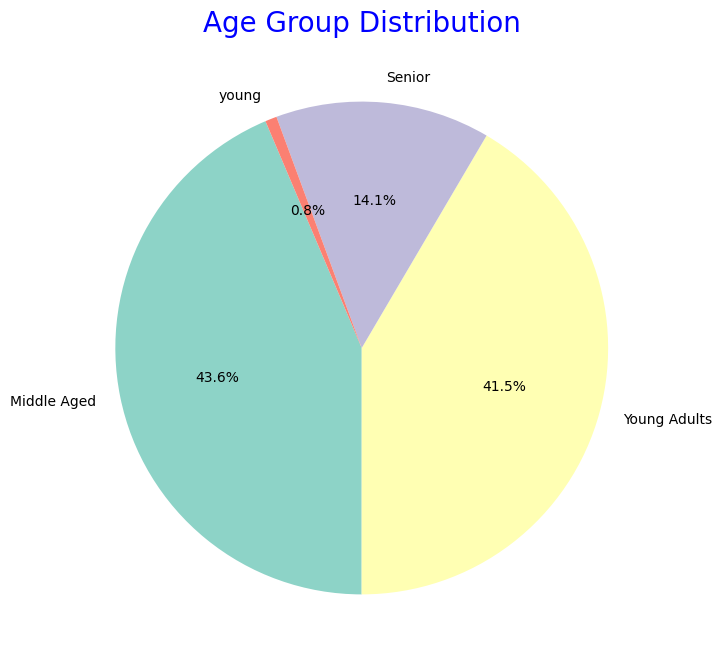

In [10]:
colors = ['#8dd3c7', '#ffffb3', '#bebada', '#fb8072']
plt.figure(figsize = (8 , 8))
plt.pie(age_group_counts['count'], labels = age_group_counts['age group'], autopct='%1.1f%%', startangle=113 , colors=colors)
plt.title('Age Group Distribution', color = 'blue', fontsize = 20)
plt.show()